In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

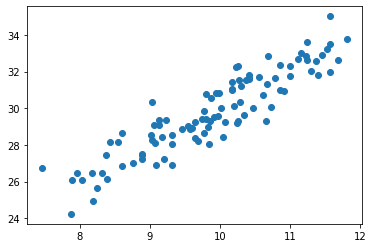

In [39]:
rows = 100

x = np.random.randn(rows) + 10

y = 2*x + (np.random.randn(rows) + 10)

plt.scatter(x, y);

In [105]:
def gradient_descent():
    alpha = 0.001
    theta0 = 10
    theta1 = 1

    m = len(x)
    total_error = 0
    
    for _ in range(10):
        
        def cost_function_theta0(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                total += (( (theta0 + (theta1 * xi) ) - yi ) ** 2)
            return total/m

        def cost_function_theta1(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                a = (( ( (theta0 + (theta1 * xi) ) - yi ) ** 2 ) * xi)
                print(theta1 * xi)
                total += a
            return total/m

        tmp0 = theta0 - (alpha * cost_function_theta0(theta0, theta1))
        tmp1 = theta1 - (alpha * cost_function_theta1(theta0, theta1))
        
        theta0 = tmp0
        theta1 = tmp1
        
        print(cost_function_theta1(theta0, theta1))
        
    return tmp0, tmp1

In [106]:
gradient_descent()

9.011604335900708
11.298940145986785
10.304979548387095
9.05914577899803
11.575955879028298
11.807964199676098
8.608900231086565
9.037527950267977
10.855729310343838
7.4662256942727865
9.85086539530257
8.60472650629129
8.373555384619078
10.652530107061507
9.207473088403137
8.318150680988339
11.375067405013393
9.319669393307716
9.639527234290785
10.021495290766124
9.03679561920017
9.07696449133099
8.029982400235246
10.204298369110994
11.453566299606724
9.837237759860363
10.270577154454985
10.175767537024978
9.324221585651943
8.890466080519133
9.454037013814684
10.723452304907418
9.547850627656569
11.396069153950283
11.250722120317551
10.175221907272023
10.230878100545238
10.28420194298169
8.428600226719132
10.48079358946057
9.56889914993247
11.24040713757184
10.783278529738258
9.806623973715753
8.89603885944001
9.941651725915264
9.862692758261572
7.886409267070435
9.228285946332774
11.571431868372665
10.260582224073282
11.006330021203462
9.136748263844154
8.1817465535401
9.7816243908236

-162532598163820.2
-155598720112408.72
-155464127512813.16
-154652164094600.06
-133001525615183.31
-151751332340370.66
-170141864749356.22
-146625423558431.6
-142361962379180.1
2.1516776974061414e+29
-131240120007898.31
-164551638692551.72
-150076135413693.28
-131932487811107.86
-168585945647597.4
-171964789048804.6
-125375355746896.28
-131617657473346.61
-158096956364028.53
-108734063280917.1
-143462663081062.12
-125314571881715.95
-121947920992511.19
-155137673329592.34
-134092646331297.62
-121141036925871.42
-165660314821476.1
-135726612489960.31
-140384848678698.78
-145947624373510.38
-131606992200700.14
-132191989877310.17
-116944310312182.88
-148609869301887.6
-166803530165038.6
-143264197586551.44
-149575117599337.8
-148194361731057.3
-135792908151341.62
-129475928130266.75
-137683469669126.25
-156170545769346.56
-139049720281121.52
-165966172907130.44
-163849417507566.5
-148186415475142.3
-148996962100592.84
-149773541632914.56
-122749564230912.97
-152636595792278.03
-139356259

/Users/sabih.hasan/envs/dataenv/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


(-5.038474228664003e+209, -5.081070555445708e+210)